In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('Sales Data.csv')
df = pd.DataFrame(df)
df = df.head(1000)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


<Axes: xlabel='City', ylabel='count'>

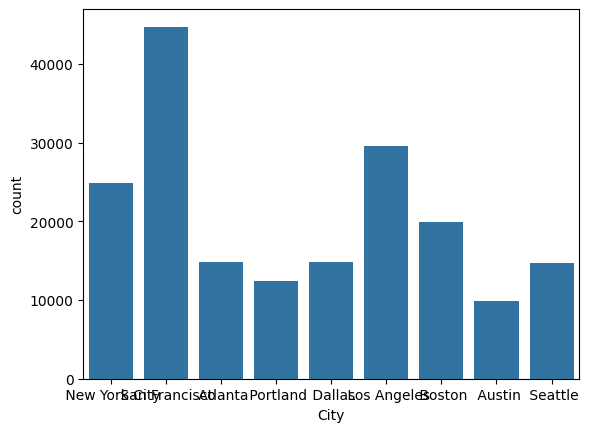

In [4]:
# Count Plot of Orders by City: 
# Use a count plot to show the number of orders coming from each city.

sns.countplot(x='City' ,data=df) 

<Axes: xlabel='Sales', ylabel='Month'>

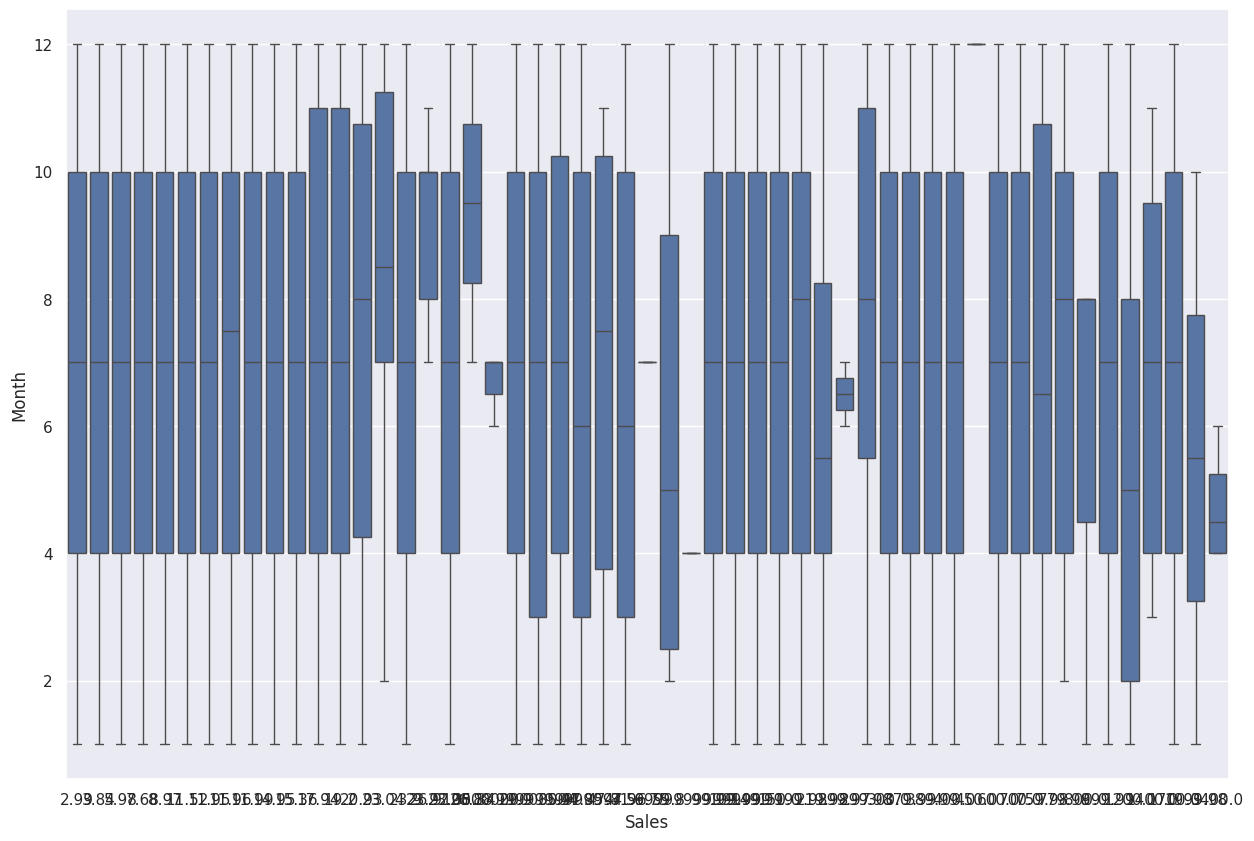

In [15]:
# Box Plot of Sales by Month: 
# Create a box plot to visualize the distribution of sales for each month.

sns.set_theme(rc={'figure.figsize':(15,10)})
sns.boxplot(x = df['Sales'] , y=df['Month'] )


<Axes: xlabel='Product', ylabel='Month'>

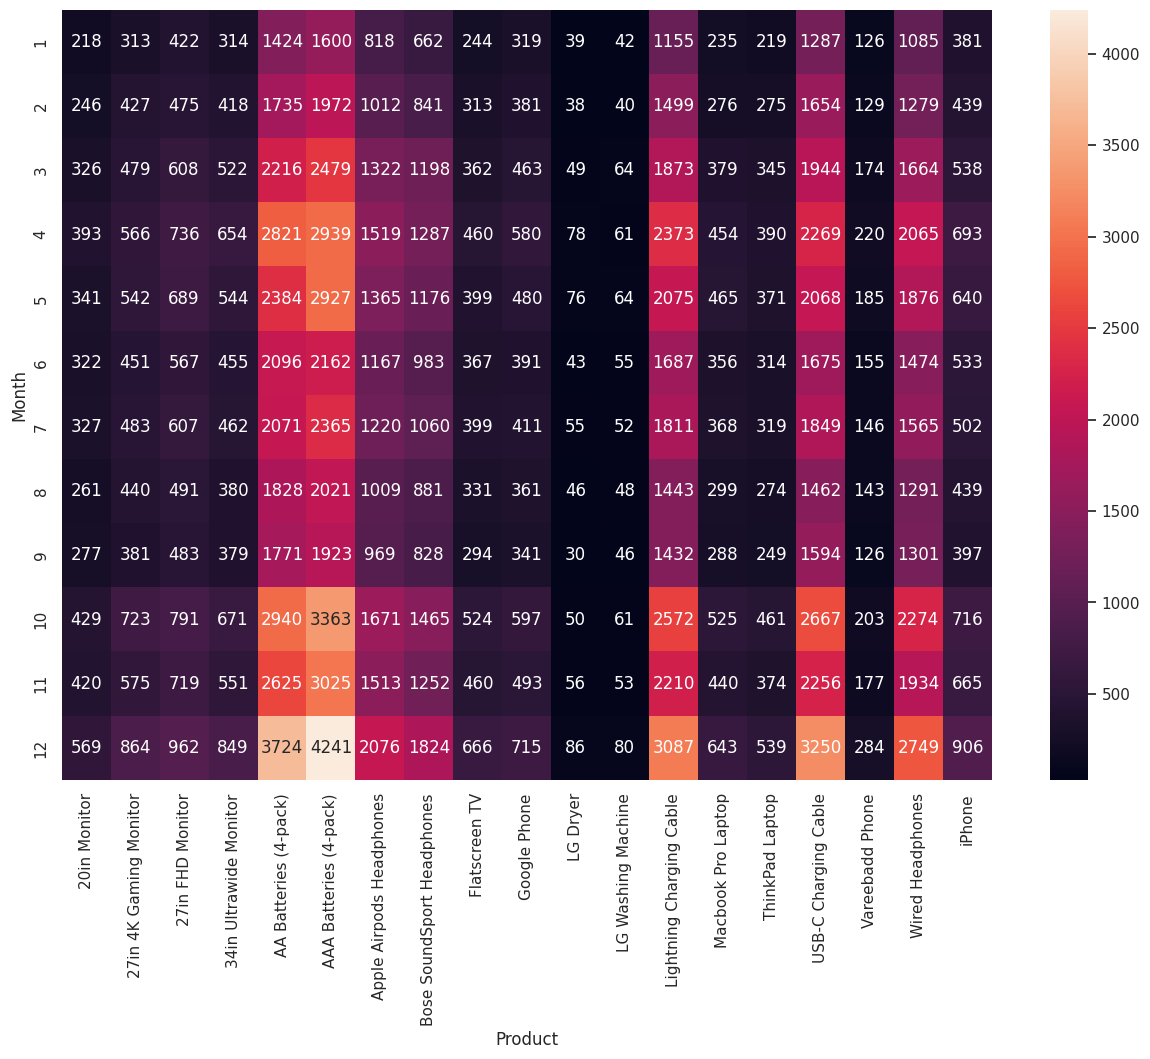

In [24]:
# Heatmap of Quantity Ordered by Product and Month: 
# Create a heatmap to show the quantity ordered for each product across different months.

product_month_quantity = df.groupby(['Month', 'Product'])['Quantity Ordered'].sum().unstack()

sns.heatmap(product_month_quantity, annot=True, fmt='.0f')


<Axes: ylabel='Product'>

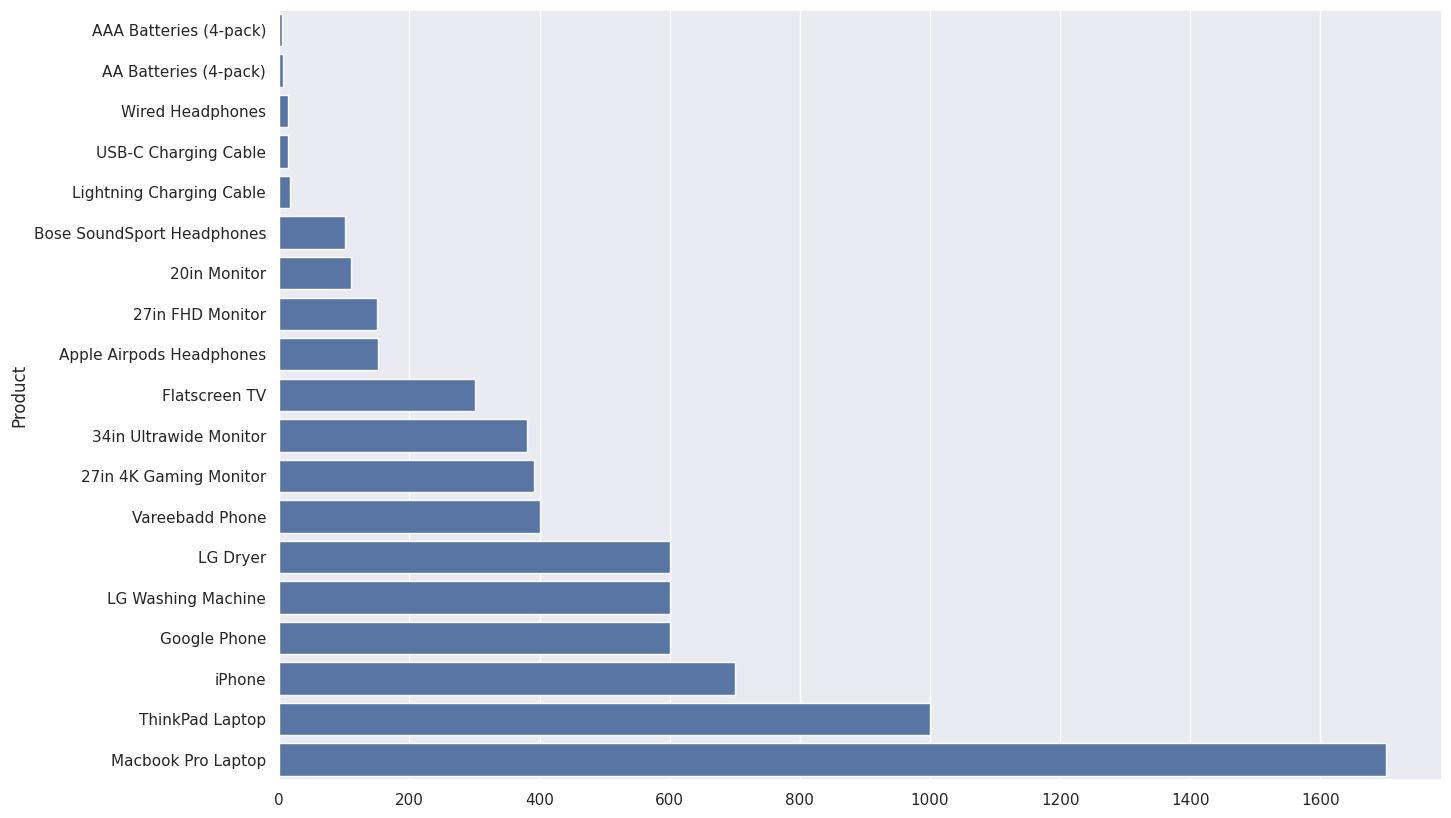

In [42]:
# Bar Plot of Average Sales per Product: 
# Use a bar plot to show the average sales amount for each product.

average_sales_product = df.groupby('Product')['Sales'].mean().sort_values()
sns.barplot(x = average_sales_product.values , y=average_sales_product.index)

<Axes: xlabel='City', ylabel='Sales'>

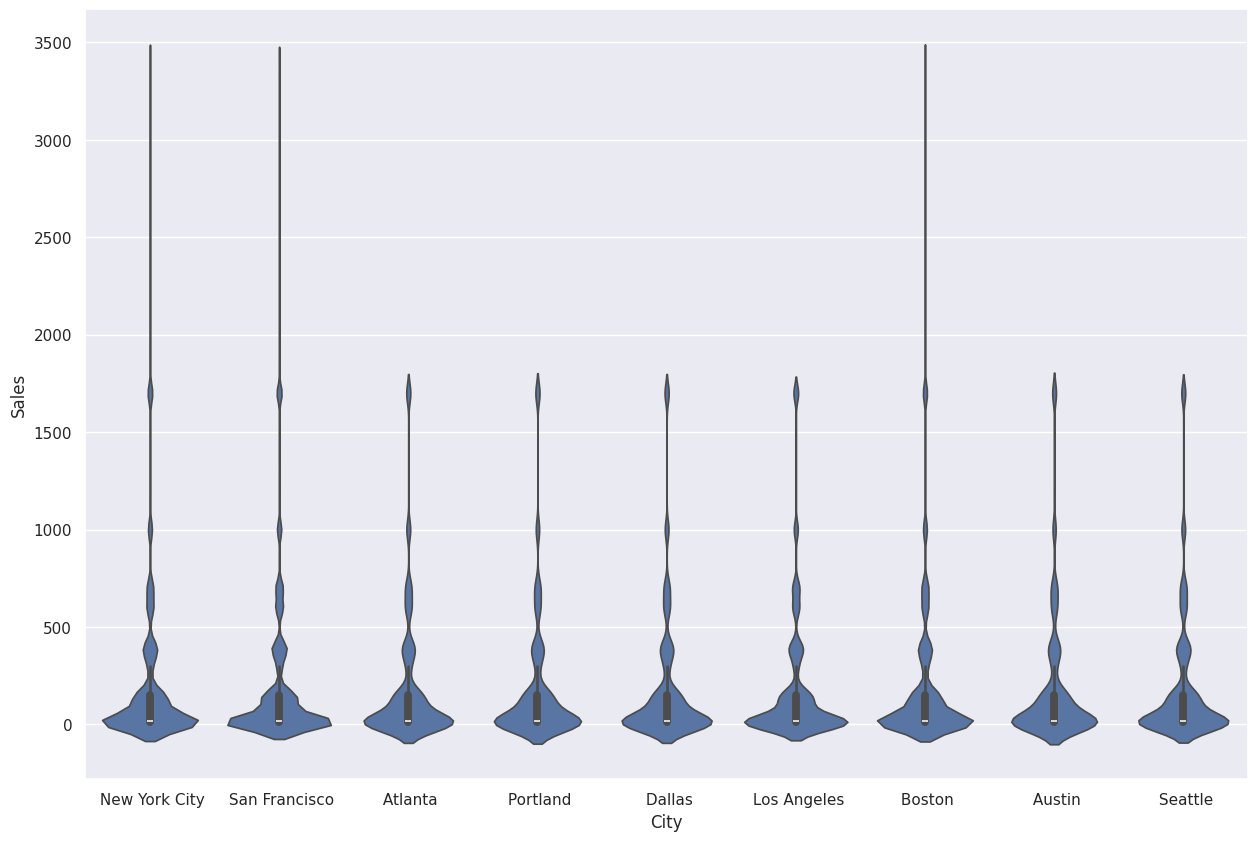

In [48]:
# Violin Plot of Sales by City: 
# Draw a violin plot to display the distribution of sales amounts for each city.


sns.violinplot(x = df['City'], y=df['Sales']) 

Text(0.5, 1.05, 'Sales by Hour and City')

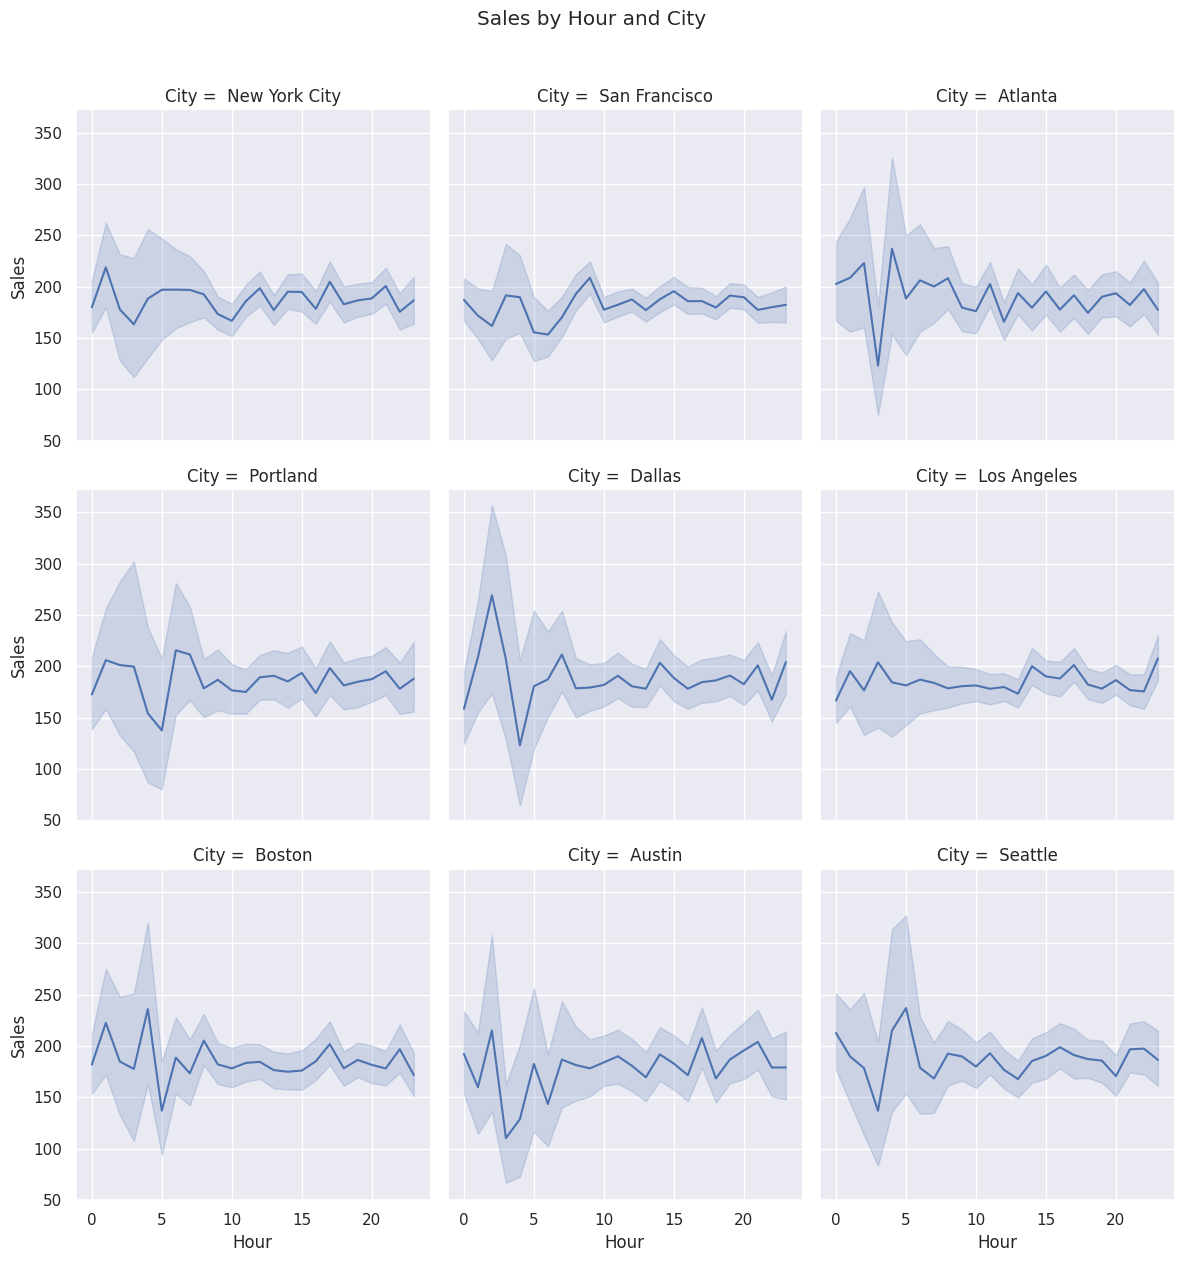

In [62]:
# facet Grid of Sales by Hour and City: 
# Use a Facet Grid to plot sales data by hour, separated by city

g = sns.FacetGrid(df , col='City' , col_wrap=3 , height=4)
g.map(sns.lineplot , 'Hour', 'Sales')
g.fig.suptitle('Sales by Hour and City' , y = 1.05)


Text(0.5, 1.02, 'Pair Plot of Sales Data')

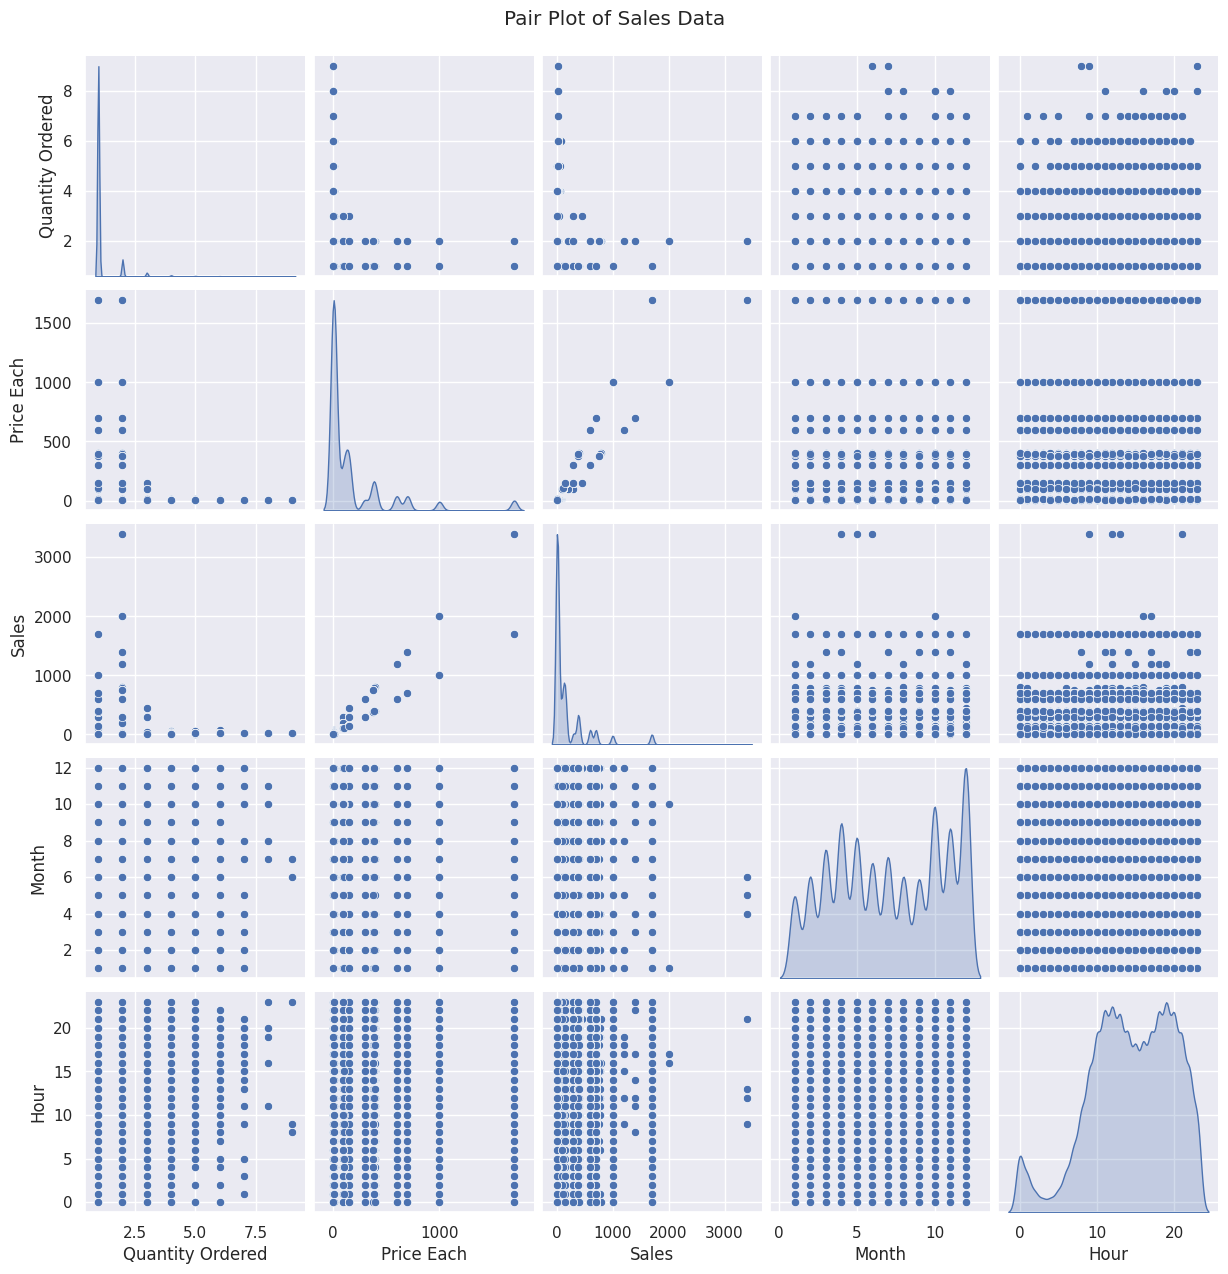

In [63]:
# Pair Plot of Sales Data: 
# Create a pair plot to explore relationships between different numerical variables in the dataset

sns.pairplot(df[['Quantity Ordered', 'Price Each', 'Sales', 'Month', 'Hour']] ,diag_kind='kde' )
plt.suptitle('Pair Plot of Sales Data', y=1.02)

Text(0, 0.5, 'Sales')

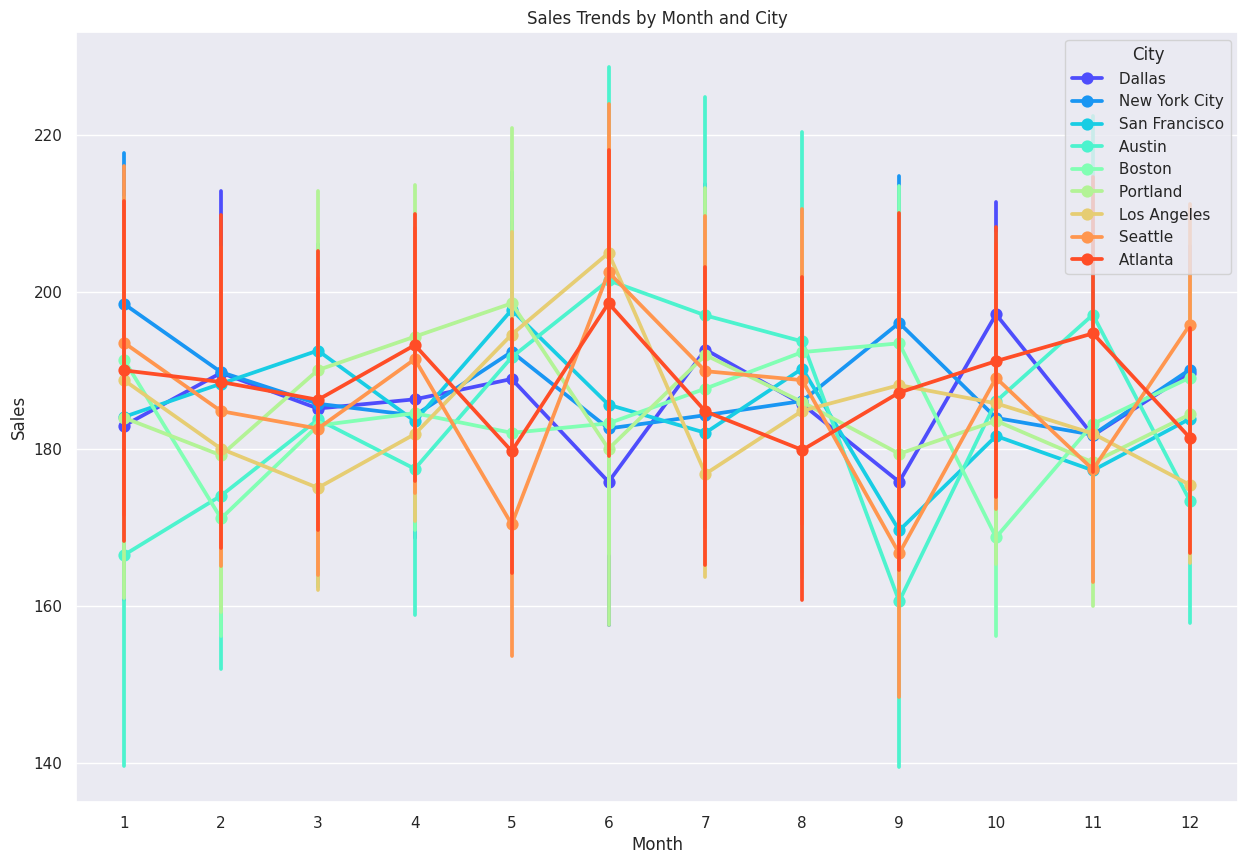

In [82]:
# Point Plot of Sales by Month and City: 
# Create a point plot to show sales trends over the months, differentiated by city

sns.pointplot(data=df, x='Month', y='Sales', hue='City' , palette='rainbow')

plt.title('Sales Trends by Month and City')
plt.xlabel('Month')
plt.ylabel('Sales')


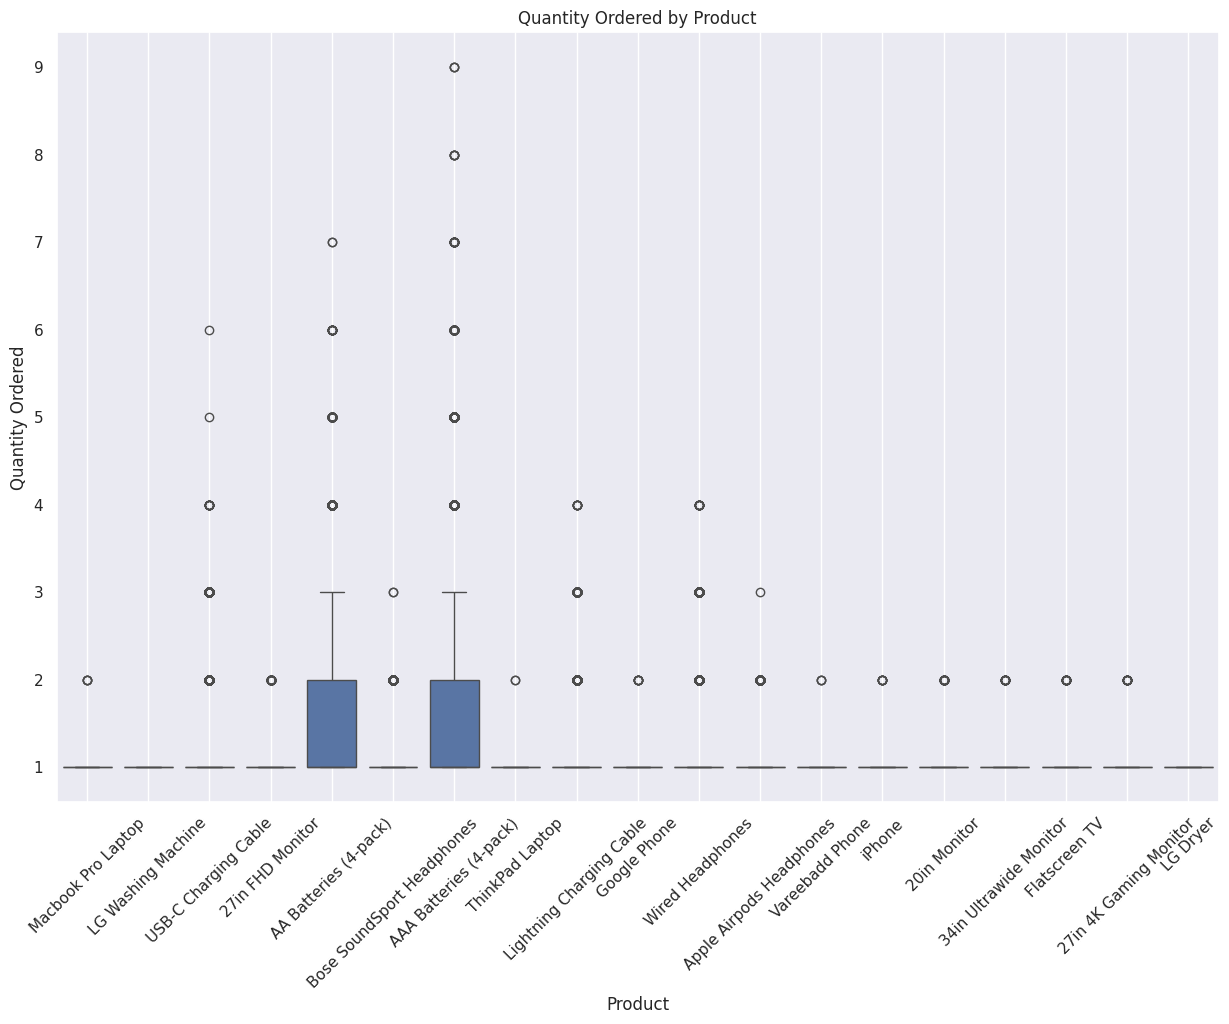

In [72]:
# Box Plot of Quantity Ordered by Product: 
# Create a box plot to show the distribution of quantities ordered for each product. 



sns.boxplot(data=df, x='Product', y='Quantity Ordered')

plt.title('Quantity Ordered by Product')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation = 45)
plt.grid()


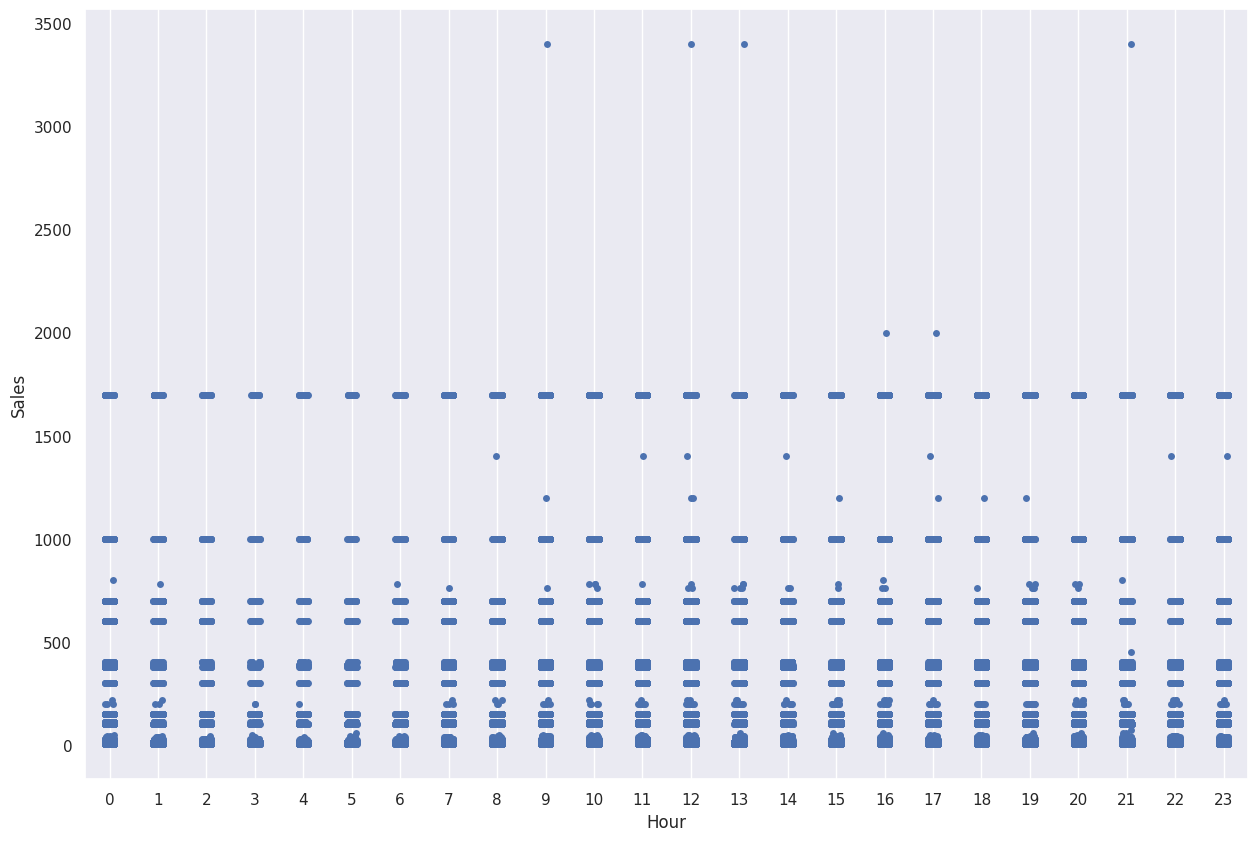

In [78]:
# Strip Plot of Sales by Hour:
# Use a strip plot to display individual sales amounts across different hours of the day. 

sns.stripplot(data=df , x = 'Hour' , y = 'Sales' , jitter=True)
plt.grid()